In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [4]:
original_image = load_image('original2.jfif')
artist_image = load_image('artistimage.jpg')

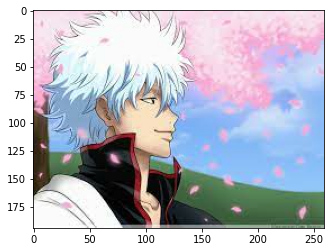

In [5]:
plt.imshow(np.squeeze(original_image))
plt.show()

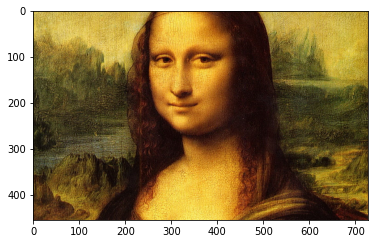

In [8]:
plt.imshow(np.squeeze(artist_image))
plt.show()

In [9]:
aesthetic_image = model(tf.constant(original_image), tf.constant(artist_image))[0]

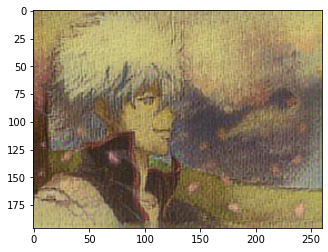

In [10]:
plt.imshow(np.squeeze(aesthetic_image))
plt.show()

In [11]:
cv2.imwrite('aesthetic_image.jpg', cv2.cvtColor(np.squeeze(aesthetic_image)*255, cv2.COLOR_BGR2RGB))

True